In [1]:
%matplotlib inline

# Explore shapely pypi -- web research, *wsi_annotations_sample.zip*
## *wsi_annotations_sample.zip* contents
```python
wsi_annotation_sample_files = [  'class_label_csv_manager.py',
                                 'class_label_id.csv',
                                 '54742d6c5d704efa8f0814456453573a.xml',
                                 'region_annotation.py' ]
```
## Shapely:
[Shapely GitHub](https://github.com/Toblerity/Shapely) <br>
[Shapely PyPi](https://pypi.org/project/Shapely/) <br>
[Shapely Documentation, Manual](https://shapely.readthedocs.io/en/latest/) <br>
[Shapely GIS stack-exchange](https://gis.stackexchange.com/questions/tagged/shapely) <br>
****
...`May Be Useful` <br>
[shapely object.bounds](https://shapely.readthedocs.io/en/latest/manual.html#object.bounds) <br>
[shapely object.contains](https://shapely.readthedocs.io/en/latest/manual.html#object.contains) <br>
[shapely object.centroid](https://shapely.readthedocs.io/en/latest/manual.html#object.centroid) <br>
[shapely object.intersects](https://shapely.readthedocs.io/en/latest/manual.html#object.intersects) <br>
[shapely object.envelope](https://shapely.readthedocs.io/en/latest/manual.html#object.envelope) <br>
[shapely object.overlaps](https://shapely.readthedocs.io/en/latest/manual.html#object.overlaps) <br>
[shapely object.touches](https://shapely.readthedocs.io/en/latest/manual.html#object.touches) <br>
[shapely object.union](https://shapely.readthedocs.io/en/latest/manual.html#object.union) <br>
[shapely object.within](https://shapely.readthedocs.io/en/latest/manual.html#object.within) <br>
****

[point, line, polygon](https://automating-gis-processes.github.io/site/notebooks/L1/geometric-objects.html) <br>
****

...`Noteworthy notebooks` <br>
[Auto-GIS](https://automating-gis-processes.github.io/site/notebooks/L1/geometric-objects.html) <br>
 ****
 ...`Peripherally Related` <br>
 [geo-whatever twilio (intro)](https://www.twilio.com/blog/2017/08/geospatial-analysis-python-geojson-geopandas.html) <br>
 [matplotlib plot shapely stuff: StackOverflow](https://stackoverflow.com/questions/55522395/how-do-i-plot-shapely-polygons-and-objects-using-matplotlib) <br>
****
...`Fully Acronym'ed` <br>
****
```python
"""
        wkt = well known text    ( format ) <br>
        wkb = well known binary  ( format ) <br>
"""
#      polygon is a list of tuples (not shapely points
import geojson
import geopandas
import shapely
```


## try basic shapely:
```bash
# install shapely
pip3 install shapely
```

In [2]:
import os
import sys
import json
import xml.etree.ElementTree as ET
from xml.dom import minidom

import numpy as np
import pandas as pd

# import shapely
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

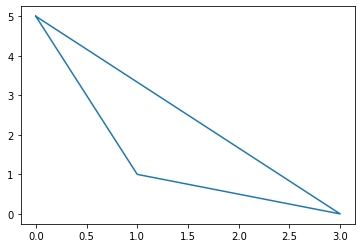

In [3]:
#                           a polygon is a list of tuples ----- (not shapely points)
polygon1 = Polygon([(0,5),
                    (1,1),
                    (3,0)])

x,y = polygon1.exterior.xy
plt.plot(x,y);
"""
plt.plot(*polygon1.exterior.xy) # ok ok ok
# plt.plot(polygon1)   no! no! no!
"""
plt.show()

## *wsi_annotation_sample.zip* contents:

In [4]:
zip_tank = '../../DigiPath_MLTK_data/zipTank/wsi_annotation_sample/'
os.listdir(zip_tank)

['class_label_csv_manager.py',
 'class_label_id.csv',
 '54742d6c5d704efa8f0814456453573a.xml',
 'e39a8d60a56844d695e9579bce8f0335.xml',
 'region_annotation.py']

In [5]:
c_lab_id_fn = os.path.join(zip_tank, 'class_label_id.csv')
c_lab_id_df = pd.read_csv(c_lab_id_fn, index_col=0).T
c_lab_id_df

Label,NaN,fat,lymph,Region,malignant,offset,ink,normal
ID,0,1,2,3,4,5,6,7
Priority,0,1,2,3,4,5,6,7


In [6]:
print('with file: %s\n'%(c_lab_id_fn))

with open(c_lab_id_fn, 'r') as fh:
    lines = fh.readlines()
    
label_dict = {}    
if len(lines) > 0:
    for line in lines:
        line_list = line.strip().split(',')
        if len(line_list) > 1 and line_list[0] != 'Label':
            label_dict[line_list[0]] = line_list[1:]
        else:
            print(' ',line.strip().split(','))
            
for k, v in label_dict.items():
    print('%10s: %i, %i'%(k, int(v[0]), int(v[1])))

with file: ../../DigiPath_MLTK_data/zipTank/wsi_annotation_sample/class_label_id.csv

  ['Label', 'ID', 'Priority']
      null: 0, 0
       fat: 1, 1
     lymph: 2, 2
    Region: 3, 3
 malignant: 4, 4
    offset: 5, 5
       ink: 6, 6
    normal: 7, 7


In [7]:
"""
                View XML with vertices, region_Id, class_label_Id, region_geo_shape, coords
"""
xml_dakine = os.path.join(zip_tank, '54742d6c5d704efa8f0814456453573a.xml')
xml_obj = minidom.parse(xml_dakine)
regions_dom = xml_obj.getElementsByTagName("Region")

regions_list = []
for reg_dom in regions_dom:
    tmp_dict = {}
    tmp_dict['vertices'] = reg_dom.getElementsByTagName("Vertex")
    tmp_dict['region_Id'] = reg_dom.getAttribute('Id')
    tmp_dict['class_label_text'] = reg_dom.getAttribute('Text')
    tmp_dict['class_label_Id'] = reg_dom.getAttribute('Type')
    tmp_dict['region_geo_shape'] = reg_dom.getAttribute('GeoShape')
    tmp_dict['coords'] = np.zeros((len(tmp_dict['vertices']), 2))
    for i, vertex in enumerate(tmp_dict['vertices']):
        tmp_dict['coords'][i][0] = vertex.attributes['X'].value
        tmp_dict['coords'][i][1] = vertex.attributes['Y'].value
    regions_list.append(tmp_dict)

print('regions_list has %i items\n'%(len(regions_list)))
for l_it in regions_list:
    for k, v in l_it.items():
        if isinstance(v, list):
            print('%20s:'%(k))
            for v_it in v:
                print('%20s %s'%('-', v_it))
        elif isinstance(v, np.ndarray):
            print('%20s:'%(k))
            for ix in range(v.shape[0]):
                print('%20s '%(' '), v[ix])
        else:
            print('%20s: %s'%(k,v))

regions_list has 1 items

            vertices:
                   - <DOM Element: Vertex at 0x7f8a09d19a60>
                   - <DOM Element: Vertex at 0x7f8a09d19af8>
                   - <DOM Element: Vertex at 0x7f8a09d19b90>
           region_Id: 1
    class_label_text: null
      class_label_Id: 0
    region_geo_shape: Points
              coords:
                      [18040.966797 16813.011719]
                      [37044.824219 46742.457031]
                      [74755.21875  36969.667969]
